In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [7]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure9/"

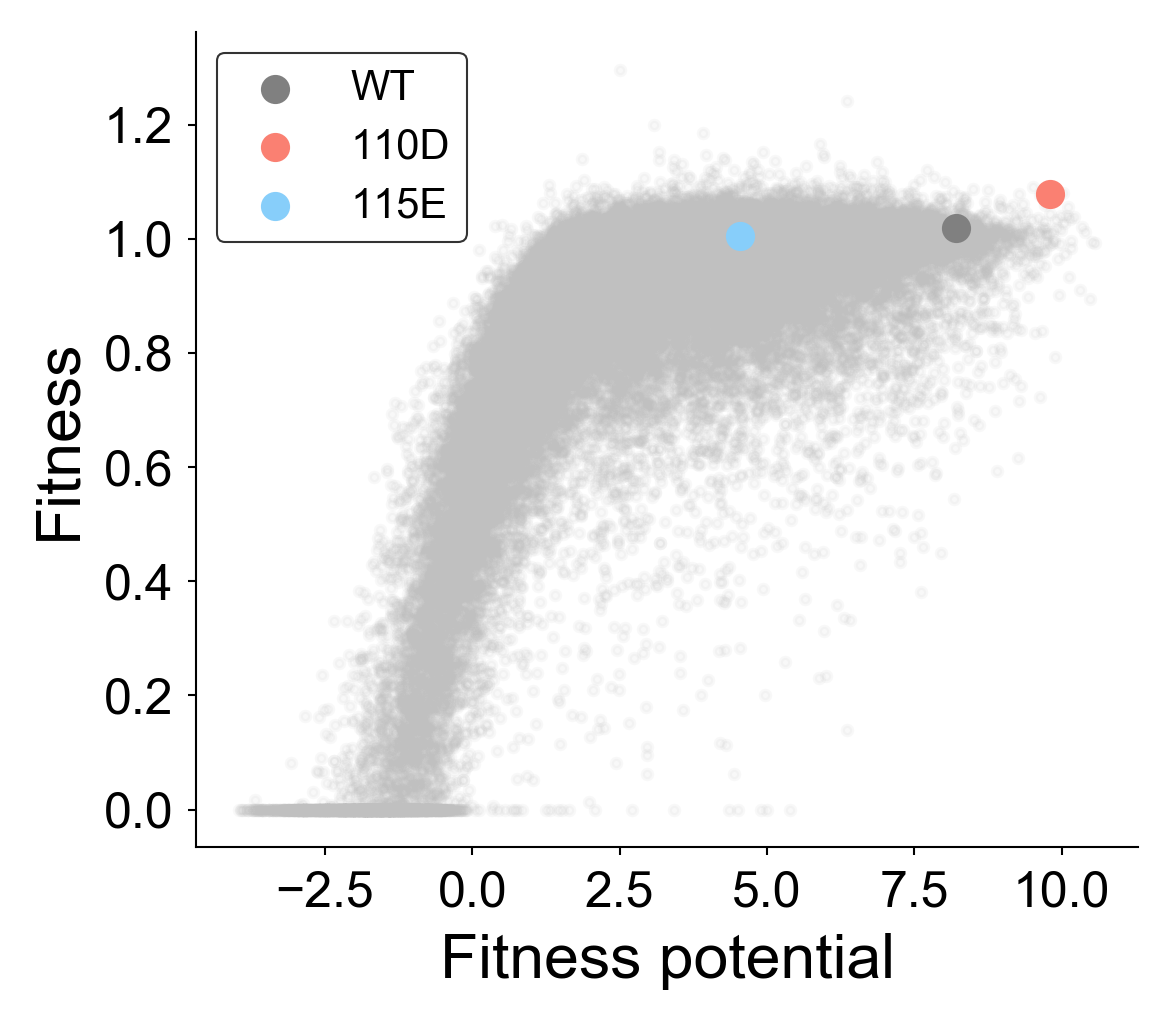

In [8]:
#plot the FPVSFitness and show that 110D moves into insenstive regions of FE, but 115E differs
#to say that the NN model can predict fitnss using fitness poptential very well
plt.rcParams["figure.dpi"] = 300
seg1_predictData = pd.read_csv(readdata_dir + "DeepLearningWeights/EachGenotypeFitnessPredicted1.tsv",
                              sep = "\t")

wt = [8.200222600251436,1.0194867989799998]
A110D = [9.804758358746767,1.07917206616]
K115E = [4.549105513840914,1.0045073916399998]

plt.figure(figsize=(4,3.5))
ax = plt.subplot(111)
chunk = 1

X = seg1_predictData["-1*fitnessPotential"]
y = seg1_predictData["fitnessTrue"]
plt.scatter(X, y,s=5, color='silver',alpha = 0.1)
#add the WT:115E:110D
ax1 = plt.scatter(wt[0],wt[1], color = "grey")
ax2 = plt.scatter(A110D[0],A110D[1],color = "salmon")
ax3 = plt.scatter(K115E[0], K115E[1], color = "lightskyblue")
#add the legend
legend  = plt.legend([ ax1,ax2,ax3], [ 'WT','110D','115E'], 
                     scatterpoints=1,edgecolor='black',fontsize=10)    
legend = legend.get_frame().set_linewidth(0.5)

#modify the xticks and yticks
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize = 12)
plt.xticks(fontsize = 12)
#plt.xticks([-5,0,5],[0,10,20],fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xlabel("Fitness potential",fontsize = 15)
plt.ylabel("Fitness",fontsize = 15)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "FPCanPredictFitness.png",dpi = 300)

In [9]:
#plot the distribution of absolute fitness difference that 110D and 115E are different 
D110Data = pd.read_csv(readdata_dir + "SuperCompensationFile/A110D.txt", sep = "\t")
E115Data = pd.read_csv(readdata_dir + "SuperCompensationFile/K115E.txt", sep = "\t")

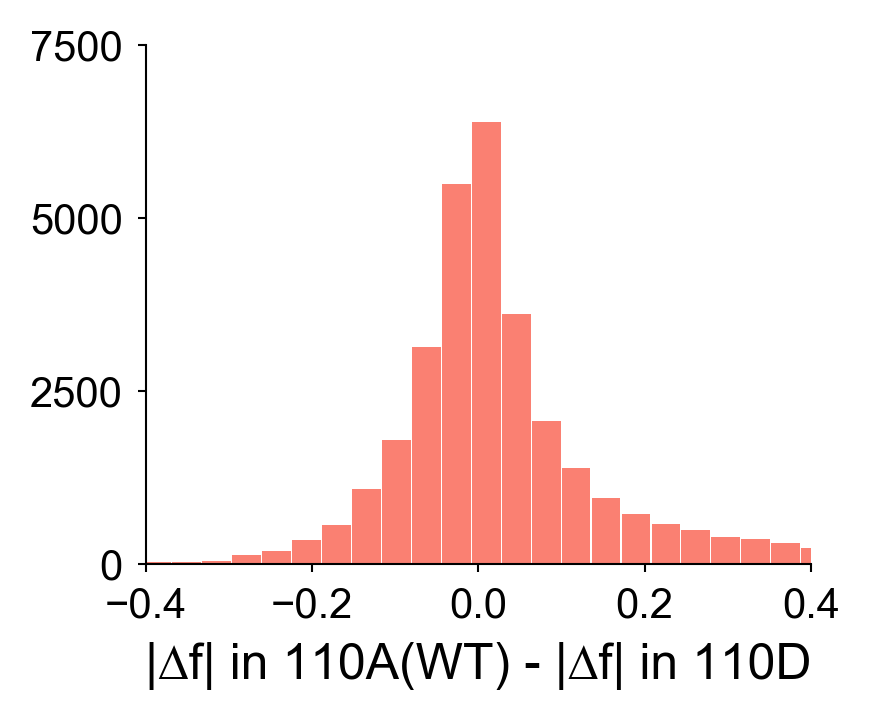

In [24]:
#plot the FE absolute difference of these two different FEs
#plot the hist plot
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
plt.hist(-1*D110Data["abd_FE_minus_wt"].values,bins=50,color="salmon",rwidth=0.96)

plt.xlabel("|∆f| in 110A(WT) - |∆f| in 110D",fontsize=12)
#plt.ylabel("# of substitutions in\ndifferent genetic backgrounds",fontsize=6)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)




#plt.xticks([-0.5,0.00,0.5],[-0.5,0.00,0.5],fontsize = 5)
plt.yticks([0,2500,5000,7500],[0,2500,5000,7500],fontsize = 10)
plt.xlim(-0.4,0.4)

plt.tight_layout()
plt.savefig(savedata_dir  + "A110q_dist.png",dpi=300)

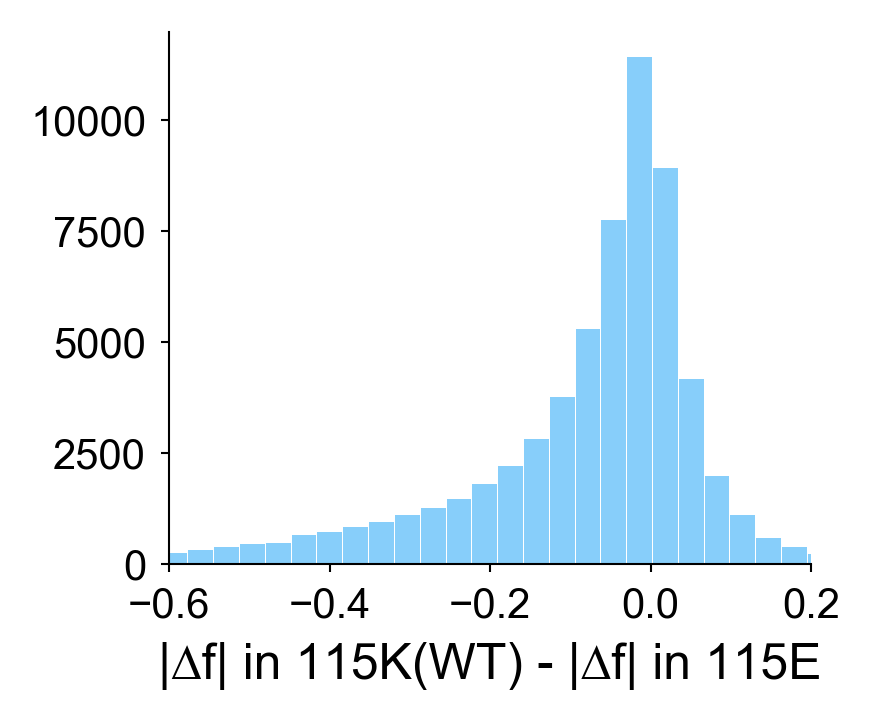

In [23]:
#plot the FE absolute difference of these two different FEs
#plot the hist plot
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
plt.hist(-1*E115Data["abd_FE_minus_wt"].values,bins=50,color="lightskyblue",rwidth=0.96)

plt.xlabel("|∆f| in 115K(WT) - |∆f| in 115E",fontsize=12)
#plt.ylabel("# of substitutions in\ndifferent genetic backgrounds",fontsize=6)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)




#plt.xticks([-0.5,0.00,0.5],[-0.5,0.00,0.5],fontsize = 5)
plt.yticks([0,2500,5000,7500,10000],[0,2500,5000,7500,10000],fontsize = 10)
plt.xlim(-0.6,0.2)

plt.tight_layout()
plt.savefig(savedata_dir  + "K115e_dist.png",dpi=300)

In [105]:
#plot the correlation between skewness and CA and NN weights(FP_WT)
#load FP and Skwenss data 
FP_data = pd.read_csv(readdata_dir + "SuperCompensationFile/SubBufferingAbility.tsv",sep = "\t")
FP_data

,AAstate,ddG_fold,ddG_foldOpt,ddG_bind,compensationAbility,skewness,segment,FitnessImpactScoreRelativeWT
0,9N,0.72,0.72,0.72,0.002540,-1.1448229674266526,12,-0.507580
1,9S,7.29,7.25,7.29,0.002716,-0.2602305963762161,12,-0.209753
2,9R,-8.41,-8.41,-8.41,0.000000,0.10920158145392374,12,0.120027
3,117Y,0.41,1.64,0.39,0.017657,-1.6375509362477878,6,-0.453947
4,203S,20.55,20.56,20.55,0.009337,-1.7458583994160852,5,-1.995300
...,...,...,...,...,...,...,...,...
212,73G,3.14,2.94,2.76,0.000000,-2.0148452988645844,7,-0.979297
213,183T,-2.98,-2.98,-2.99,0.033959,0.9500476240512852,5,0.435834
214,11D,10.69,10.69,10.69,0.003885,-1.3580268517198737,12,-0.506657
215,11N,18.11,17.75,18.11,0.002451,-0.7204515864543307,12,-0.319405


In [107]:
#load the FI distribution data 
fp_singleAAData  = pd.read_csv(readdata_dir + "DeepLearningWeights/DLWeightsFI.tsv",
                              sep = "\t")
fp_singleAAData_FP = pd.merge(FP_data, fp_singleAAData,left_on="AAstate",right_on="AAstate")
fp_singleAAData_FP_keep = fp_singleAAData_FP[fp_singleAAData_FP["skewness"]!="NAN"]

C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


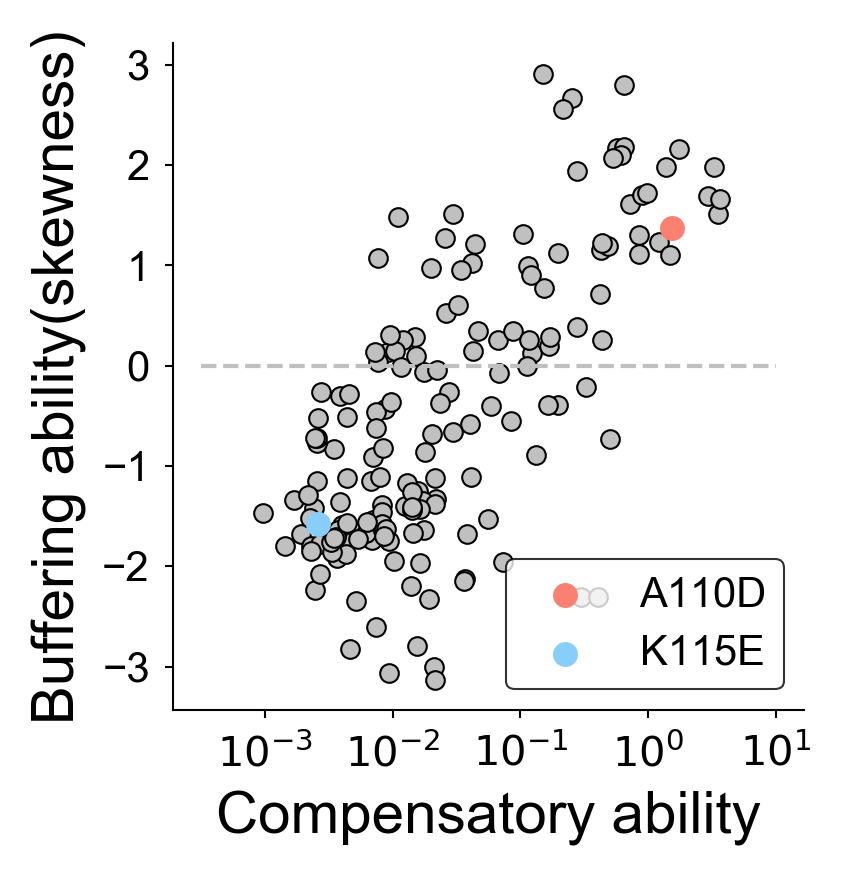

In [53]:
#plot the corrleation between CA and skewness 
plt.figure(figsize=(3,3))
ax = plt.subplot(111)

CA_nonwt_big = FP_data[FP_data['compensationAbility']>0]
CA_nonwt_big['log'] = [np.log10(i) for i in CA_nonwt_big['compensationAbility'].values]

ax.scatter(CA_nonwt_big["log"].values,[float(i) for i in CA_nonwt_big['skewness'].values],
s = 20,color = "silver",edgecolor = "k",  linewidths=0.5)


A110D = [CA_nonwt_big[CA_nonwt_big["AAstate"] == '110D']['log'].values, 
         float(CA_nonwt_big[CA_nonwt_big["AAstate"] == '110D']['skewness'].values)]
K115E = [CA_nonwt_big[CA_nonwt_big["AAstate"] == '115E']['log'].values, 
         float(CA_nonwt_big[CA_nonwt_big["AAstate"] == '115E']['skewness'].values)]

plt.scatter(A110D[0], A110D[1],
            color='salmon',label = "A110D",  s = 30,   linewidths=0.5)

plt.scatter(K115E[0], K115E[1],
            color='lightskyblue',label = 'K115E',   s = 30,  linewidths=0.5)

#modify the legend
legend = plt.legend( loc='lower right', scatterpoints=1,edgecolor='black',fontsize=10) 
legend.get_frame().set_linewidth(0.5)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
ax.tick_params( axis='both',length=2)

#add the label names
plt.xticks([-3,-2,-1,0,1],['$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$'],
        fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Compensatory ability",fontsize = 14)
plt.ylabel("Buffering ability(skewness)", fontsize = 14)
plt.tight_layout()
#save the figure
plt.plot([-3.5,1],[0,0],ls = "--",color = "silver",linewidth=1)    
plt.savefig(savedata_dir + "CAVSSkenwness.png", dpi = 300)

In [103]:
FP_data_keep = FP_data[FP_data["skewness"] != "NAN"]
print(stats.spearmanr(FP_data_keep["compensationAbility"].values,[float(i) for i in FP_data_keep['skewness'].values]))

SpearmanrResult(correlation=0.6653542098266182, pvalue=9.964117870562729e-29)


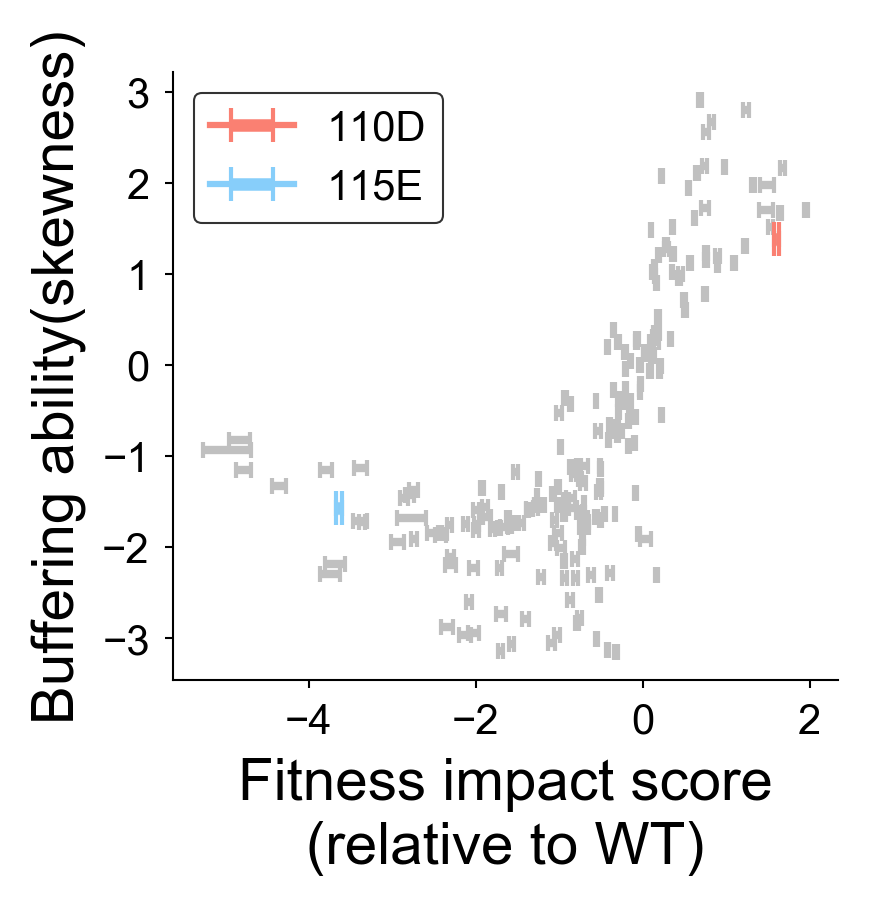

In [94]:
#plot the result
plt.figure(figsize=(3,3))
ax = plt.subplot(111)
fp_singleAAData_FP_keep = fp_singleAAData_FP_keep[fp_singleAAData_FP_keep["FI_mean"]>=-5]
fp_singleAAData_FP_keep["skewness"] = [np.float(i) for i in fp_singleAAData_FP_keep["skewness"].values]

A110D = fp_singleAAData_FP_keep[fp_singleAAData_FP_keep["AAstate"] == '110D']
K115E = fp_singleAAData_FP_keep[fp_singleAAData_FP_keep["AAstate"] == '115E']
D110 = [A110D["FI_mean"].values[0], A110D["FI_std"].values[0], A110D["skewness"].values[0]]
E115 = [K115E["FI_mean"].values[0], K115E["FI_std"].values[0], K115E["skewness"].values[0]]

for row in range(fp_singleAAData_FP_keep.shape[0]):
    plt.errorbar( fp_singleAAData_FP_keep['FI_mean'].values[row],fp_singleAAData_FP_keep['skewness'].values[row],
                 xerr = fp_singleAAData_FP_keep['FI_std'].values[row],
                  elinewidth=2,markersize=1.0,capsize=2,
            color='silver')

plt.errorbar(float(D110[0]), D110[2],xerr = D110[1],
            color='salmon',   elinewidth=3.0,markersize=1.0,capsize=4,label = "110D")
plt.errorbar(float(E115[0]), E115[2],xerr = E115[1],
            color='lightskyblue', elinewidth=3.0,markersize=1.0,capsize=4,label = '115E')

#legend
legend = plt.legend( scatterpoints=1, edgecolor='black',fontsize=10) 
legend.get_frame().set_linewidth(0.5)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)

#save figure
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel("Buffering ability(skewness)",fontsize = 14)
plt.xlabel("Fitness impact score\n(relative to WT)", fontsize = 14)
plt.tight_layout()

plt.savefig(savedata_dir + "fitness_impact_scoreVS_skewness.png",dpi = 300)

In [104]:
print(stats.spearmanr(fp_singleAAData_FP_keep['FI_mean'].values,fp_singleAAData_FP_keep['skewness'].values))

SpearmanrResult(correlation=0.7802315701745841, pvalue=1.1946940319038823e-43)
